# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [7]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.7985612998927536e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [9]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.561318e-09
b1 max relative error: 1.555471e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 3.865091e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.017149607938732093


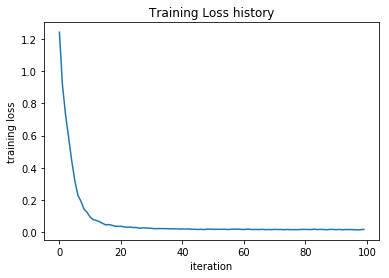

In [10]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [11]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [12]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

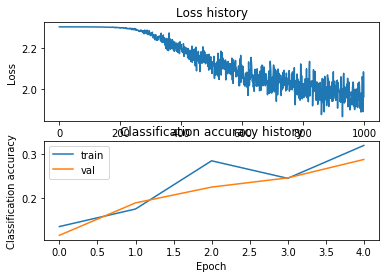

In [13]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

(50, 32, 32, 3)


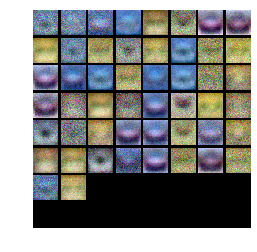

In [15]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    print(W1.shape)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

iteration 0 / 1000: loss 2.303441
iteration 100 / 1000: loss 1.919389
iteration 200 / 1000: loss 1.773672
iteration 300 / 1000: loss 1.679242
iteration 400 / 1000: loss 1.660096
iteration 500 / 1000: loss 1.489746
iteration 600 / 1000: loss 1.524153
iteration 700 / 1000: loss 1.460433
iteration 800 / 1000: loss 1.563600
iteration 900 / 1000: loss 1.388752
Validation accuracy:  0.477
hidden size:  110  lr: 0.001  reg: 0.25  iter: 1000


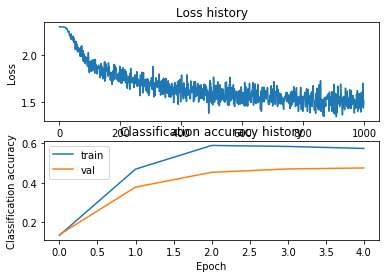

iteration 0 / 1500: loss 2.303432
iteration 100 / 1500: loss 1.937111
iteration 200 / 1500: loss 1.727933
iteration 300 / 1500: loss 1.770621
iteration 400 / 1500: loss 1.646539
iteration 500 / 1500: loss 1.642310
iteration 600 / 1500: loss 1.561744
iteration 700 / 1500: loss 1.611995
iteration 800 / 1500: loss 1.479676
iteration 900 / 1500: loss 1.502103
iteration 1000 / 1500: loss 1.466049
iteration 1100 / 1500: loss 1.519156
iteration 1200 / 1500: loss 1.559928
iteration 1300 / 1500: loss 1.517264
iteration 1400 / 1500: loss 1.476235
Validation accuracy:  0.49
hidden size:  110  lr: 0.001  reg: 0.25  iter: 1500


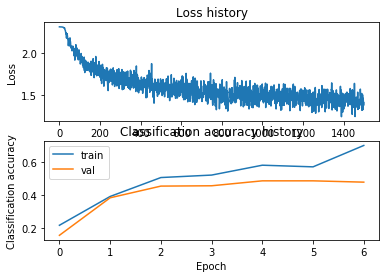

iteration 0 / 1000: loss 2.303570
iteration 100 / 1000: loss 1.947043
iteration 200 / 1000: loss 1.827093
iteration 300 / 1000: loss 1.757332
iteration 400 / 1000: loss 1.713127
iteration 500 / 1000: loss 1.582952
iteration 600 / 1000: loss 1.472263
iteration 700 / 1000: loss 1.534229
iteration 800 / 1000: loss 1.581258
iteration 900 / 1000: loss 1.463323
Validation accuracy:  0.474
hidden size:  110  lr: 0.001  reg: 0.3  iter: 1000


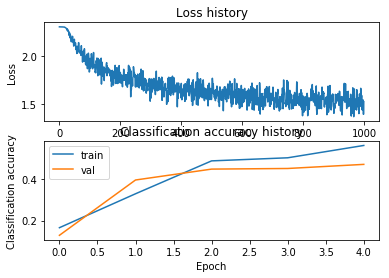

iteration 0 / 1500: loss 2.303592
iteration 100 / 1500: loss 1.957234
iteration 200 / 1500: loss 1.829672
iteration 300 / 1500: loss 1.723664
iteration 400 / 1500: loss 1.580576
iteration 500 / 1500: loss 1.755776
iteration 600 / 1500: loss 1.575369
iteration 700 / 1500: loss 1.537610
iteration 800 / 1500: loss 1.616464
iteration 900 / 1500: loss 1.473965
iteration 1000 / 1500: loss 1.468875
iteration 1100 / 1500: loss 1.531064
iteration 1200 / 1500: loss 1.465953
iteration 1300 / 1500: loss 1.435129
iteration 1400 / 1500: loss 1.492394
Validation accuracy:  0.491
hidden size:  110  lr: 0.001  reg: 0.3  iter: 1500


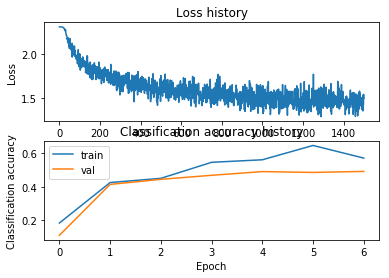

iteration 0 / 1000: loss 2.303789
iteration 100 / 1000: loss 1.933024
iteration 200 / 1000: loss 1.847507
iteration 300 / 1000: loss 1.725429
iteration 400 / 1000: loss 1.704795
iteration 500 / 1000: loss 1.659715
iteration 600 / 1000: loss 1.536830
iteration 700 / 1000: loss 1.656784
iteration 800 / 1000: loss 1.528058
iteration 900 / 1000: loss 1.529969
Validation accuracy:  0.474
hidden size:  110  lr: 0.001  reg: 0.35  iter: 1000


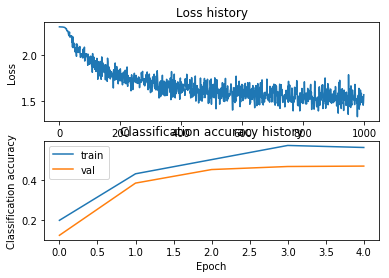

iteration 0 / 1500: loss 2.303756
iteration 100 / 1500: loss 1.936670
iteration 200 / 1500: loss 1.755843
iteration 300 / 1500: loss 1.716529
iteration 400 / 1500: loss 1.572615
iteration 500 / 1500: loss 1.690340
iteration 600 / 1500: loss 1.415258
iteration 700 / 1500: loss 1.576925
iteration 800 / 1500: loss 1.592341
iteration 900 / 1500: loss 1.492076
iteration 1000 / 1500: loss 1.461817
iteration 1100 / 1500: loss 1.450828
iteration 1200 / 1500: loss 1.601475
iteration 1300 / 1500: loss 1.414085
iteration 1400 / 1500: loss 1.523393
Validation accuracy:  0.504
hidden size:  110  lr: 0.001  reg: 0.35  iter: 1500


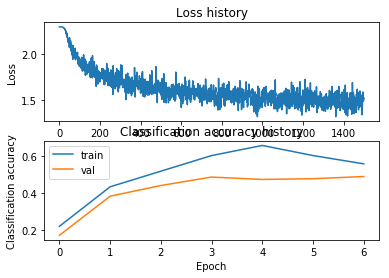

iteration 0 / 1000: loss 2.303446
iteration 100 / 1000: loss 1.781135
iteration 200 / 1000: loss 1.814754
iteration 300 / 1000: loss 1.525604
iteration 400 / 1000: loss 1.582161
iteration 500 / 1000: loss 1.717791
iteration 600 / 1000: loss 1.550022
iteration 700 / 1000: loss 1.677846
iteration 800 / 1000: loss 1.504721
iteration 900 / 1000: loss 1.440650
Validation accuracy:  0.461
hidden size:  110  lr: 0.002  reg: 0.25  iter: 1000


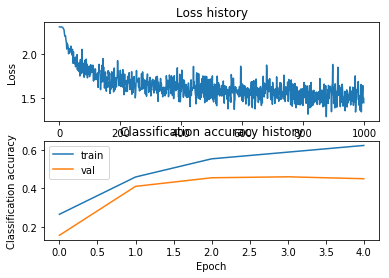

iteration 0 / 1500: loss 2.303368
iteration 100 / 1500: loss 1.795725
iteration 200 / 1500: loss 1.737083
iteration 300 / 1500: loss 1.730904
iteration 400 / 1500: loss 1.568386
iteration 500 / 1500: loss 1.646153
iteration 600 / 1500: loss 1.538287
iteration 700 / 1500: loss 1.380272
iteration 800 / 1500: loss 1.547361
iteration 900 / 1500: loss 1.519401
iteration 1000 / 1500: loss 1.369888
iteration 1100 / 1500: loss 1.434740
iteration 1200 / 1500: loss 1.361098
iteration 1300 / 1500: loss 1.477475
iteration 1400 / 1500: loss 1.523116
Validation accuracy:  0.474
hidden size:  110  lr: 0.002  reg: 0.25  iter: 1500


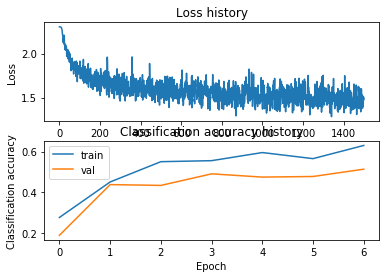

iteration 0 / 1000: loss 2.303578
iteration 100 / 1000: loss 1.843980
iteration 200 / 1000: loss 1.736594
iteration 300 / 1000: loss 1.635741
iteration 400 / 1000: loss 1.591342
iteration 500 / 1000: loss 1.667605
iteration 600 / 1000: loss 1.541586
iteration 700 / 1000: loss 1.588710
iteration 800 / 1000: loss 1.651541
iteration 900 / 1000: loss 1.483961
Validation accuracy:  0.482
hidden size:  110  lr: 0.002  reg: 0.3  iter: 1000


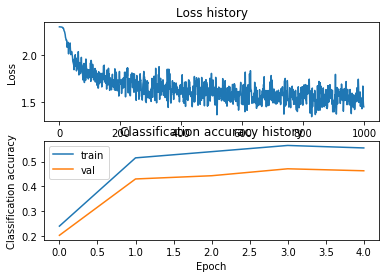

iteration 0 / 1500: loss 2.303608
iteration 100 / 1500: loss 1.895862
iteration 200 / 1500: loss 1.775246
iteration 300 / 1500: loss 1.669988
iteration 400 / 1500: loss 1.613275
iteration 500 / 1500: loss 1.526724
iteration 600 / 1500: loss 1.530406
iteration 700 / 1500: loss 1.616499
iteration 800 / 1500: loss 1.488213
iteration 900 / 1500: loss 1.685444
iteration 1000 / 1500: loss 1.403956
iteration 1100 / 1500: loss 1.446302
iteration 1200 / 1500: loss 1.623061
iteration 1300 / 1500: loss 1.536908
iteration 1400 / 1500: loss 1.498842
Validation accuracy:  0.511
hidden size:  110  lr: 0.002  reg: 0.3  iter: 1500


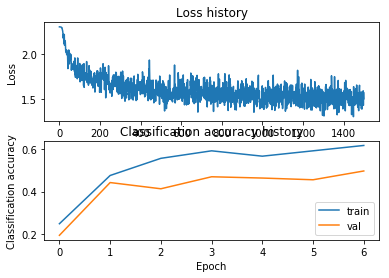

iteration 0 / 1000: loss 2.303777
iteration 100 / 1000: loss 1.942529
iteration 200 / 1000: loss 1.722257
iteration 300 / 1000: loss 1.689040
iteration 400 / 1000: loss 1.717997
iteration 500 / 1000: loss 1.646340
iteration 600 / 1000: loss 1.706746
iteration 700 / 1000: loss 1.613014
iteration 800 / 1000: loss 1.704554
iteration 900 / 1000: loss 1.599436
Validation accuracy:  0.464
hidden size:  110  lr: 0.002  reg: 0.35  iter: 1000


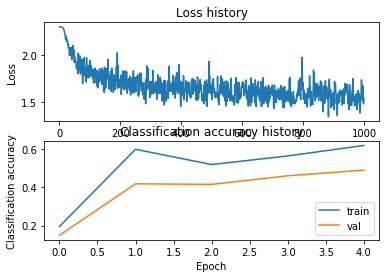

iteration 0 / 1500: loss 2.303763
iteration 100 / 1500: loss 1.931205
iteration 200 / 1500: loss 1.667646
iteration 300 / 1500: loss 1.686571
iteration 400 / 1500: loss 1.559411
iteration 500 / 1500: loss 1.531376
iteration 600 / 1500: loss 1.610733
iteration 700 / 1500: loss 1.725211
iteration 800 / 1500: loss 1.672689
iteration 900 / 1500: loss 1.688669
iteration 1000 / 1500: loss 1.617325
iteration 1100 / 1500: loss 1.565134
iteration 1200 / 1500: loss 1.621372
iteration 1300 / 1500: loss 1.454376
iteration 1400 / 1500: loss 1.552918
Validation accuracy:  0.499
hidden size:  110  lr: 0.002  reg: 0.35  iter: 1500


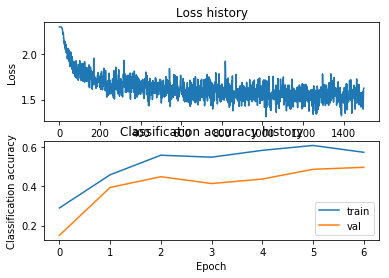

iteration 0 / 1000: loss 2.303439
iteration 100 / 1000: loss 1.760166
iteration 200 / 1000: loss 1.771557
iteration 300 / 1000: loss 1.795086
iteration 400 / 1000: loss 1.735474
iteration 500 / 1000: loss 1.633012
iteration 600 / 1000: loss 1.672274
iteration 700 / 1000: loss 1.633700
iteration 800 / 1000: loss 1.665811
iteration 900 / 1000: loss 1.590937
Validation accuracy:  0.506
hidden size:  110  lr: 0.003  reg: 0.25  iter: 1000


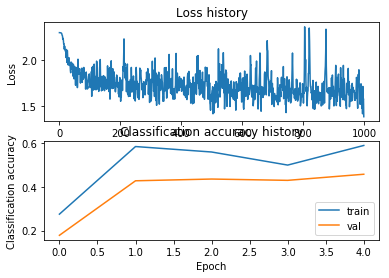

iteration 0 / 1500: loss 2.303451
iteration 100 / 1500: loss 1.819858
iteration 200 / 1500: loss 1.644483
iteration 300 / 1500: loss 1.730026
iteration 400 / 1500: loss 1.656822
iteration 500 / 1500: loss 1.573027
iteration 600 / 1500: loss 1.662946
iteration 700 / 1500: loss 1.531485
iteration 800 / 1500: loss 1.656608
iteration 900 / 1500: loss 1.711396
iteration 1000 / 1500: loss 1.730756
iteration 1100 / 1500: loss 1.681474
iteration 1200 / 1500: loss 1.503592
iteration 1300 / 1500: loss 1.637918
iteration 1400 / 1500: loss 1.634033
Validation accuracy:  0.484
hidden size:  110  lr: 0.003  reg: 0.25  iter: 1500


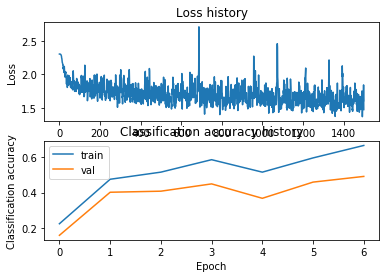

iteration 0 / 1000: loss 2.303607
iteration 100 / 1000: loss 1.776486
iteration 200 / 1000: loss 1.756340
iteration 300 / 1000: loss 1.789348
iteration 400 / 1000: loss 1.855789
iteration 500 / 1000: loss 1.801568
iteration 600 / 1000: loss 1.772907
iteration 700 / 1000: loss 1.751697
iteration 800 / 1000: loss 1.600752
iteration 900 / 1000: loss 1.713598
Validation accuracy:  0.44
hidden size:  110  lr: 0.003  reg: 0.3  iter: 1000


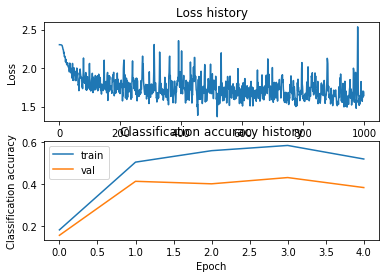

iteration 0 / 1500: loss 2.303610
iteration 100 / 1500: loss 1.936342
iteration 200 / 1500: loss 1.718243
iteration 300 / 1500: loss 1.724111
iteration 400 / 1500: loss 1.775946
iteration 500 / 1500: loss 1.690838
iteration 600 / 1500: loss 1.489703
iteration 700 / 1500: loss 1.838506
iteration 800 / 1500: loss 1.519557
iteration 900 / 1500: loss 1.767998
iteration 1000 / 1500: loss 1.605194
iteration 1100 / 1500: loss 1.808934
iteration 1200 / 1500: loss 1.535092
iteration 1300 / 1500: loss 1.599972
iteration 1400 / 1500: loss 1.576917
Validation accuracy:  0.496
hidden size:  110  lr: 0.003  reg: 0.3  iter: 1500


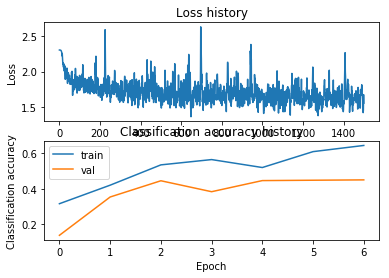

iteration 0 / 1000: loss 2.303819
iteration 100 / 1000: loss 1.838377
iteration 200 / 1000: loss 1.856413
iteration 300 / 1000: loss 1.692356
iteration 400 / 1000: loss 1.729992
iteration 500 / 1000: loss 1.643442
iteration 600 / 1000: loss 1.708260
iteration 700 / 1000: loss 1.573143
iteration 800 / 1000: loss 1.703853
iteration 900 / 1000: loss 1.756373
Validation accuracy:  0.39
hidden size:  110  lr: 0.003  reg: 0.35  iter: 1000


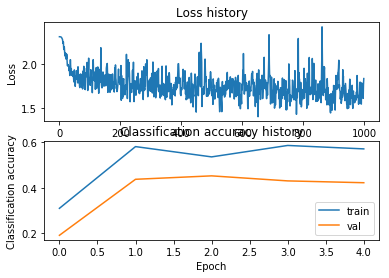

iteration 0 / 1500: loss 2.303784
iteration 100 / 1500: loss 1.793446
iteration 200 / 1500: loss 1.754601
iteration 300 / 1500: loss 1.562736
iteration 400 / 1500: loss 1.568403
iteration 500 / 1500: loss 1.775498
iteration 600 / 1500: loss 1.651910
iteration 700 / 1500: loss 1.599354
iteration 800 / 1500: loss 1.569368
iteration 900 / 1500: loss 1.789371
iteration 1000 / 1500: loss 1.576530
iteration 1100 / 1500: loss 1.642635
iteration 1200 / 1500: loss 1.758665
iteration 1300 / 1500: loss 1.644132
iteration 1400 / 1500: loss 1.579733
Validation accuracy:  0.472
hidden size:  110  lr: 0.003  reg: 0.35  iter: 1500


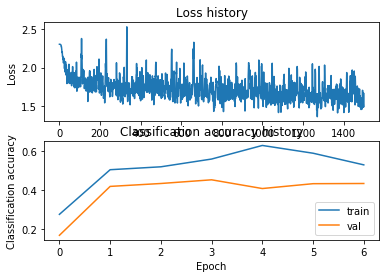

iteration 0 / 1000: loss 2.303609
iteration 100 / 1000: loss 1.879807
iteration 200 / 1000: loss 1.752695
iteration 300 / 1000: loss 1.686823
iteration 400 / 1000: loss 1.722769
iteration 500 / 1000: loss 1.669026
iteration 600 / 1000: loss 1.598430
iteration 700 / 1000: loss 1.464827
iteration 800 / 1000: loss 1.368339
iteration 900 / 1000: loss 1.517791
Validation accuracy:  0.472
hidden size:  130  lr: 0.001  reg: 0.25  iter: 1000


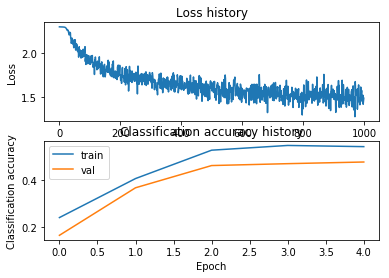

iteration 0 / 1500: loss 2.303583
iteration 100 / 1500: loss 1.955871
iteration 200 / 1500: loss 1.676237
iteration 300 / 1500: loss 1.718963
iteration 400 / 1500: loss 1.613303
iteration 500 / 1500: loss 1.588077
iteration 600 / 1500: loss 1.547505
iteration 700 / 1500: loss 1.446251
iteration 800 / 1500: loss 1.378849
iteration 900 / 1500: loss 1.434468
iteration 1000 / 1500: loss 1.559375
iteration 1100 / 1500: loss 1.626450
iteration 1200 / 1500: loss 1.491107
iteration 1300 / 1500: loss 1.399052
iteration 1400 / 1500: loss 1.491582
Validation accuracy:  0.494
hidden size:  130  lr: 0.001  reg: 0.25  iter: 1500


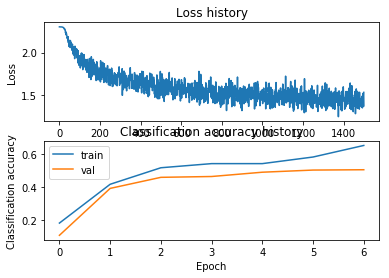

iteration 0 / 1000: loss 2.303791
iteration 100 / 1000: loss 1.915973
iteration 200 / 1000: loss 1.698865
iteration 300 / 1000: loss 1.661462
iteration 400 / 1000: loss 1.592408
iteration 500 / 1000: loss 1.470521
iteration 600 / 1000: loss 1.464545
iteration 700 / 1000: loss 1.607392
iteration 800 / 1000: loss 1.556576
iteration 900 / 1000: loss 1.520489
Validation accuracy:  0.49
hidden size:  130  lr: 0.001  reg: 0.3  iter: 1000


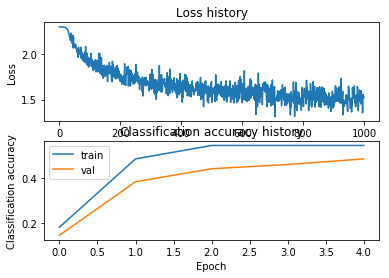

iteration 0 / 1500: loss 2.303763
iteration 100 / 1500: loss 1.882093
iteration 200 / 1500: loss 1.780834
iteration 300 / 1500: loss 1.771623
iteration 400 / 1500: loss 1.724083
iteration 500 / 1500: loss 1.556645
iteration 600 / 1500: loss 1.602576
iteration 700 / 1500: loss 1.571684
iteration 800 / 1500: loss 1.449174
iteration 900 / 1500: loss 1.484803
iteration 1000 / 1500: loss 1.485177
iteration 1100 / 1500: loss 1.524138
iteration 1200 / 1500: loss 1.470183
iteration 1300 / 1500: loss 1.427203
iteration 1400 / 1500: loss 1.555454
Validation accuracy:  0.49
hidden size:  130  lr: 0.001  reg: 0.3  iter: 1500


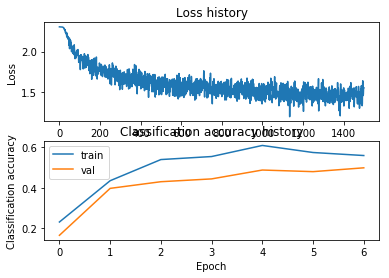

iteration 0 / 1000: loss 2.303971
iteration 100 / 1000: loss 1.935165
iteration 200 / 1000: loss 1.726725
iteration 300 / 1000: loss 1.680109
iteration 400 / 1000: loss 1.677719
iteration 500 / 1000: loss 1.647642
iteration 600 / 1000: loss 1.493200
iteration 700 / 1000: loss 1.523895
iteration 800 / 1000: loss 1.566736
iteration 900 / 1000: loss 1.468768
Validation accuracy:  0.474
hidden size:  130  lr: 0.001  reg: 0.35  iter: 1000


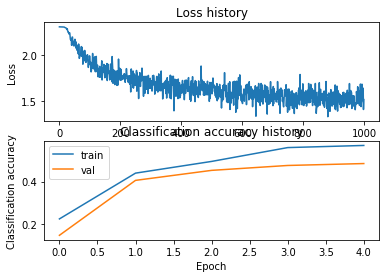

iteration 0 / 1500: loss 2.303999
iteration 100 / 1500: loss 1.914987
iteration 200 / 1500: loss 1.736496
iteration 300 / 1500: loss 1.644892
iteration 400 / 1500: loss 1.522787
iteration 500 / 1500: loss 1.551243
iteration 600 / 1500: loss 1.500211
iteration 700 / 1500: loss 1.624462
iteration 800 / 1500: loss 1.583395
iteration 900 / 1500: loss 1.486507
iteration 1000 / 1500: loss 1.473425
iteration 1100 / 1500: loss 1.492065
iteration 1200 / 1500: loss 1.396160
iteration 1300 / 1500: loss 1.443708
iteration 1400 / 1500: loss 1.533012
Validation accuracy:  0.488
hidden size:  130  lr: 0.001  reg: 0.35  iter: 1500


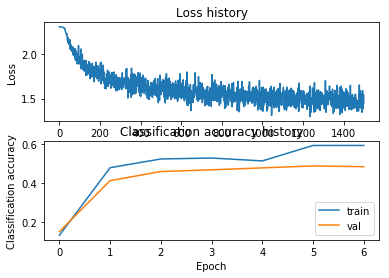

iteration 0 / 1000: loss 2.303581
iteration 100 / 1000: loss 1.791903
iteration 200 / 1000: loss 1.642520
iteration 300 / 1000: loss 1.599714
iteration 400 / 1000: loss 1.704010
iteration 500 / 1000: loss 1.521657
iteration 600 / 1000: loss 1.632835
iteration 700 / 1000: loss 1.492406
iteration 800 / 1000: loss 1.481482
iteration 900 / 1000: loss 1.498578
Validation accuracy:  0.472
hidden size:  130  lr: 0.002  reg: 0.25  iter: 1000


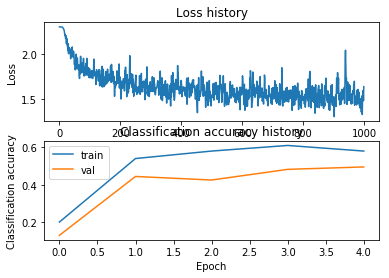

iteration 0 / 1500: loss 2.303514
iteration 100 / 1500: loss 1.773092
iteration 200 / 1500: loss 1.637341
iteration 300 / 1500: loss 1.613327
iteration 400 / 1500: loss 1.526444
iteration 500 / 1500: loss 1.621107
iteration 600 / 1500: loss 1.553904
iteration 700 / 1500: loss 1.722853
iteration 800 / 1500: loss 1.540673
iteration 900 / 1500: loss 1.423918
iteration 1000 / 1500: loss 1.479008
iteration 1100 / 1500: loss 1.659324
iteration 1200 / 1500: loss 1.546968
iteration 1300 / 1500: loss 1.598800
iteration 1400 / 1500: loss 1.491412
Validation accuracy:  0.489
hidden size:  130  lr: 0.002  reg: 0.25  iter: 1500


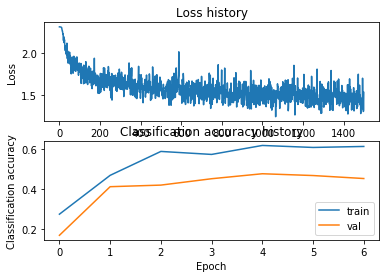

iteration 0 / 1000: loss 2.303808
iteration 100 / 1000: loss 1.769005
iteration 200 / 1000: loss 1.717647
iteration 300 / 1000: loss 1.699038
iteration 400 / 1000: loss 1.645713
iteration 500 / 1000: loss 1.635873
iteration 600 / 1000: loss 1.577416
iteration 700 / 1000: loss 1.507665
iteration 800 / 1000: loss 1.480350
iteration 900 / 1000: loss 1.421082
Validation accuracy:  0.467
hidden size:  130  lr: 0.002  reg: 0.3  iter: 1000


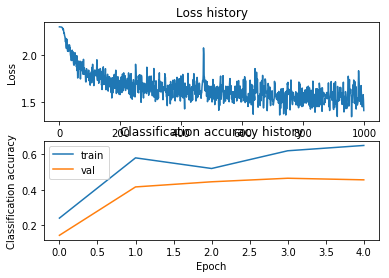

iteration 0 / 1500: loss 2.303779
iteration 100 / 1500: loss 1.776419
iteration 200 / 1500: loss 1.671291
iteration 300 / 1500: loss 1.625615
iteration 400 / 1500: loss 1.776312
iteration 500 / 1500: loss 1.633798
iteration 600 / 1500: loss 1.647947
iteration 700 / 1500: loss 1.624449
iteration 800 / 1500: loss 1.602502
iteration 900 / 1500: loss 1.641506
iteration 1000 / 1500: loss 1.528566
iteration 1100 / 1500: loss 1.633164
iteration 1200 / 1500: loss 1.478229
iteration 1300 / 1500: loss 1.702270
iteration 1400 / 1500: loss 1.373769
Validation accuracy:  0.481
hidden size:  130  lr: 0.002  reg: 0.3  iter: 1500


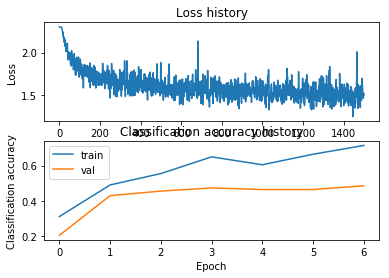

iteration 0 / 1000: loss 2.303980
iteration 100 / 1000: loss 1.690826
iteration 200 / 1000: loss 1.646207
iteration 300 / 1000: loss 1.583365
iteration 400 / 1000: loss 1.782890
iteration 500 / 1000: loss 1.437605
iteration 600 / 1000: loss 1.563213
iteration 700 / 1000: loss 1.702925
iteration 800 / 1000: loss 1.456864
iteration 900 / 1000: loss 1.486126
Validation accuracy:  0.498
hidden size:  130  lr: 0.002  reg: 0.35  iter: 1000


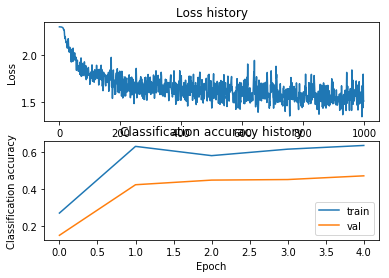

iteration 0 / 1500: loss 2.303973
iteration 100 / 1500: loss 1.668846
iteration 200 / 1500: loss 1.740988
iteration 300 / 1500: loss 1.915285
iteration 400 / 1500: loss 1.674838
iteration 500 / 1500: loss 1.561280
iteration 600 / 1500: loss 1.573191
iteration 700 / 1500: loss 1.599946
iteration 800 / 1500: loss 1.624976
iteration 900 / 1500: loss 1.422872
iteration 1000 / 1500: loss 1.476876
iteration 1100 / 1500: loss 1.530681
iteration 1200 / 1500: loss 1.532846
iteration 1300 / 1500: loss 1.635041
iteration 1400 / 1500: loss 1.361993
Validation accuracy:  0.472
hidden size:  130  lr: 0.002  reg: 0.35  iter: 1500


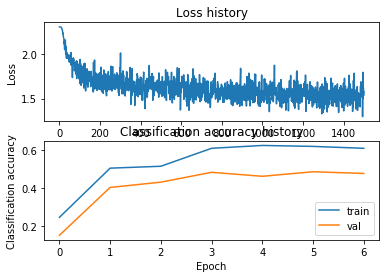

iteration 0 / 1000: loss 2.303599
iteration 100 / 1000: loss 1.813704
iteration 200 / 1000: loss 1.873703
iteration 300 / 1000: loss 1.782114
iteration 400 / 1000: loss 1.922538
iteration 500 / 1000: loss 1.655095
iteration 600 / 1000: loss 1.898523
iteration 700 / 1000: loss 1.680508
iteration 800 / 1000: loss 1.889354
iteration 900 / 1000: loss 1.662661
Validation accuracy:  0.448
hidden size:  130  lr: 0.003  reg: 0.25  iter: 1000


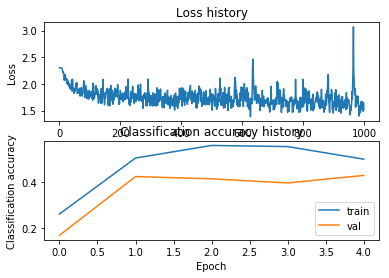

iteration 0 / 1500: loss 2.303593
iteration 100 / 1500: loss 1.797232
iteration 200 / 1500: loss 1.795682
iteration 300 / 1500: loss 1.981550
iteration 400 / 1500: loss 1.766414
iteration 500 / 1500: loss 1.658401
iteration 600 / 1500: loss 1.525996
iteration 700 / 1500: loss 1.714813
iteration 800 / 1500: loss 1.745175
iteration 900 / 1500: loss 1.786804
iteration 1000 / 1500: loss 1.626382
iteration 1100 / 1500: loss 1.576551
iteration 1200 / 1500: loss 1.538407
iteration 1300 / 1500: loss 1.772170
iteration 1400 / 1500: loss 1.674523
Validation accuracy:  0.427
hidden size:  130  lr: 0.003  reg: 0.25  iter: 1500


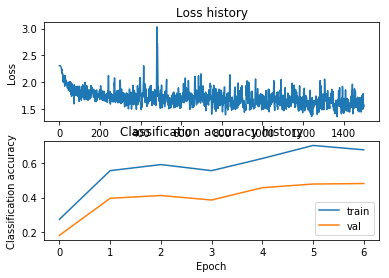

iteration 0 / 1000: loss 2.303767
iteration 100 / 1000: loss 1.694316
iteration 200 / 1000: loss 2.064436
iteration 300 / 1000: loss 1.734383
iteration 400 / 1000: loss 1.572095
iteration 500 / 1000: loss 1.688213
iteration 600 / 1000: loss 1.714748
iteration 700 / 1000: loss 1.868284
iteration 800 / 1000: loss 1.622891
iteration 900 / 1000: loss 1.581435
Validation accuracy:  0.465
hidden size:  130  lr: 0.003  reg: 0.3  iter: 1000


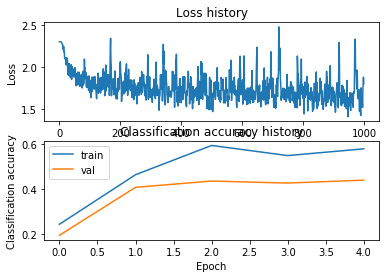

iteration 0 / 1500: loss 2.303746
iteration 100 / 1500: loss 1.817780
iteration 200 / 1500: loss 1.804713
iteration 300 / 1500: loss 1.761126
iteration 400 / 1500: loss 1.857709
iteration 500 / 1500: loss 1.802370
iteration 600 / 1500: loss 1.533121
iteration 700 / 1500: loss 1.824452
iteration 800 / 1500: loss 1.871577
iteration 900 / 1500: loss 1.467502
iteration 1000 / 1500: loss 1.515425
iteration 1100 / 1500: loss 1.563556
iteration 1200 / 1500: loss 1.631696
iteration 1300 / 1500: loss 1.864819
iteration 1400 / 1500: loss 1.546452
Validation accuracy:  0.489
hidden size:  130  lr: 0.003  reg: 0.3  iter: 1500


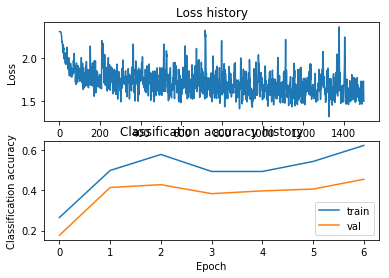

iteration 0 / 1000: loss 2.303942
iteration 100 / 1000: loss 1.855141
iteration 200 / 1000: loss 1.767664
iteration 300 / 1000: loss 1.840995
iteration 400 / 1000: loss 1.804993
iteration 500 / 1000: loss 1.894689
iteration 600 / 1000: loss 1.543646
iteration 700 / 1000: loss 1.665367
iteration 800 / 1000: loss 1.732837
iteration 900 / 1000: loss 1.729941
Validation accuracy:  0.463
hidden size:  130  lr: 0.003  reg: 0.35  iter: 1000


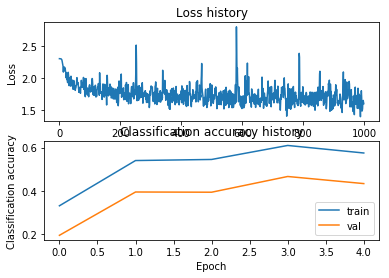

iteration 0 / 1500: loss 2.304017
iteration 100 / 1500: loss 1.904479
iteration 200 / 1500: loss 1.768937
iteration 300 / 1500: loss 1.596874
iteration 400 / 1500: loss 1.878592
iteration 500 / 1500: loss 1.641875
iteration 600 / 1500: loss 1.675724
iteration 700 / 1500: loss 1.649827
iteration 800 / 1500: loss 1.623930
iteration 900 / 1500: loss 1.665478
iteration 1000 / 1500: loss 1.581566
iteration 1100 / 1500: loss 1.854063
iteration 1200 / 1500: loss 1.627058
iteration 1300 / 1500: loss 1.443351
iteration 1400 / 1500: loss 1.553067
Validation accuracy:  0.475
hidden size:  130  lr: 0.003  reg: 0.35  iter: 1500


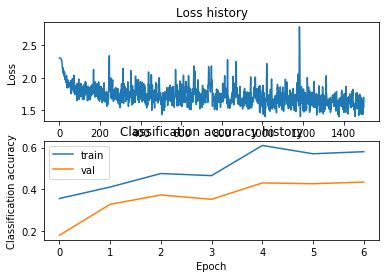

110
0.002
0.3
1500
0.511


In [20]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

input_size = 32 * 32 * 3
hidden_sizes = [110, 130]
num_classes = 10
learning_rates = [1e-3, 2e-3, 3e-3]
regs = [0.25, 0.30, 0.35]
num_iters_arr = [1000, 1500]
max_val_acc = 0
code_list = []

for hidden_size in hidden_sizes:
    for learning_rate in learning_rates:
        for reg in regs:
            for iters in num_iters_arr:
            
                net = TwoLayerNet(input_size, hidden_size, num_classes)
                # Train the network
                stats = net.train(X_train, y_train, X_val, y_val,
                            num_iters=iters, batch_size=200,
                            learning_rate=learning_rate, learning_rate_decay=0.95,
                            reg=reg, verbose=True)

                # Predict on the validation set
                val_acc = (net.predict(X_val) == y_val).mean()
                if val_acc > max_val_acc:
                    max_val_acc = val_acc
                    best_net = net
                    code_list.clear()
                    code_list.append(str(hidden_size))
                    code_list.append(str(learning_rate))
                    code_list.append(str(reg))
                    code_list.append(str(iters))
                    code_list.append(str(val_acc))

                print('Validation accuracy: ', val_acc)
                print("hidden size: ", hidden_size, " lr:", learning_rate, " reg:", reg, " iter:", iters)

                # Plot the loss function and train / validation accuracies
                plt.subplot(2, 1, 1)
                plt.plot(stats['loss_history'])
                plt.title('Loss history')
                plt.xlabel('Iteration')
                plt.ylabel('Loss')

                plt.subplot(2, 1, 2)
                plt.plot(stats['train_acc_history'], label='train')
                plt.plot(stats['val_acc_history'], label='val')
                plt.title('Classification accuracy history')
                plt.xlabel('Epoch')
                plt.ylabel('Classification accuracy')
                plt.legend()
                plt.show()

for code in code_list:
    print(code)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


(110, 32, 32, 3)


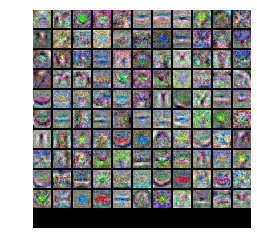

In [21]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [22]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.503


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$ 1,3

$\color{blue}{\textit Your Explanation:}$

